In [2]:
import pandas as pd
import pandas.io.data
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
# do all our graphics inline

plt.style.use('seaborn-darkgrid')
# %matplotlib inline



# Set some pandas options
pd.set_option('display.notebook_repr_html', True)
pd.set_option('display.max_columns', 10)
pd.set_option('display.max_rows', 10) 
pd.set_option('display.width', 100) 
pd.set_option('precision', 3)



plotPath = "C:\Users\Rig\PycharmProjects\ML_finance\Plots/"

def fillAndSavePlot(title, x=False, y=False,suptitle = False,legendLOC = 2):
    if suptitle == True:
        plt.suptitle(suptitle, fontsize = 25,fontweight="bold")
    else:
        plt.title(title, fontsize = 25,fontweight="bold")
        if type(x) == str:
            plt.xlabel(x,fontsize = 18)
        if type(y) == str:
            plt.ylabel(y, fontsize = 18)

    plt.annotate("AUTHOR: Karan Sagoo",xy = (0,0),xycoords='axes fraction',alpha = 0.1, fontsize = 20)
    plt.legend(loc = legendLOC)
    plt.tight_layout()
    path = plotPath
    plt.savefig(plotPath+title+".png", bbox_inches='tight', dpi = 300)
    
    
def fillAndSavePlot1(name, title, x=False, y=False,suptitle = False,legendLOC = 2):
    if suptitle == True:
        plt.suptitle(suptitle, fontsize = 25,fontweight="bold")
    else:
        name.set_title(title, fontsize = 25,fontweight="bold")
        if type(x) == str:
            name.set_xlabel(x,fontsize = 18)
        if type(y) == str:
            name.set_ylabel(y, fontsize = 18)

    name.annotate("AUTHOR: Karan Sagoo",xy = (0,0),xycoords='axes fraction',alpha = 0.1, fontsize = 20)
    name.legend(loc = legendLOC)
    plt.tight_layout()
    path = plotPath
    plt.savefig(plotPath+title+".png", bbox_inches='tight', dpi = 300)

In [3]:
start = datetime.date(2012, 1, 1)
end = datetime.date(2014, 12, 31)
msft = pd.io.data.DataReader('MSFT', "yahoo", start, end)
msft[:5];

In [4]:
# retrieves the historical prices for a list of stocks
def get(tickers, start, end):
    def data(ticker):
        return pd.io.data.DataReader(ticker, 'yahoo', 
                                     start, end)
        
    datas = map(data, tickers)
    
    return pd.concat(datas, keys=tickers, 
                     names=['Ticker', 'Date'])

In [5]:
# get data for the following stocks
tickers = ['AAPL', 'MSFT', 'GE', 'IBM', 'AA', 'DAL', 'UAL', 'PEP', 'KO']
all_data = get(tickers, start, end)
all_data[:5];

In [6]:
# get daily S&P 500 info
sp_500 = pd.io.data.DataReader("^GSPC", "yahoo", start, end)
sp_500[:5];

In [7]:
# reset the index to make everything columns
just_closing_prices = all_data[['Adj Close']].reset_index()
just_closing_prices[:5];

In [8]:
daily_close_px = just_closing_prices.pivot('Date', 
                                           'Ticker', 
                                           'Adj Close')
daily_close_px[:5]

Ticker,AA,AAPL,DAL,GE,IBM,KO,MSFT,PEP,UAL
Date,,,,,,,,,
2012-01-03,8.729,53.785,7.765,15.758,165.167,30.680,23.462,58.269,18.90
2012-01-04,8.937,54.074,7.736,15.930,164.493,30.488,24.014,58.568,18.52
2012-01-05,8.852,54.674,8.045,15.921,163.713,30.343,24.259,58.111,18.39
2012-01-06,8.663,55.245,8.036,16.007,161.833,30.151,24.636,57.383,18.21
2012-01-09,8.918,55.158,7.997,16.187,160.991,30.151,24.312,57.681,17.93


In [9]:
msftV = all_data.Volume.loc['MSFT']
daily_pct_change = daily_close_px.pct_change()
daily_pct_change.ix[:,0:2][:5]

# set NaN's to 0 
daily_pct_change.fillna(0, inplace=True)
daily_pct_change.ix[:5,:5]

Ticker,AA,AAPL,DAL,GE,IBM
Date,,,,,
2012-01-03,0.000,0.000,0.000,0.000e+00,0.000
2012-01-04,0.024,0.005,-0.004,1.089e-02,-0.004
2012-01-05,-0.010,0.011,0.040,-5.388e-04,-0.005
2012-01-06,-0.021,0.010,-0.001,5.391e-03,-0.011
2012-01-09,0.029,-0.002,-0.005,1.126e-02,-0.005


In [10]:
# use a minimum of 75 days
min_periods = 75
# calculate the rolling standard deviation
vol = pd.rolling_std(daily_pct_change, min_periods) * \
                     np.sqrt(min_periods)
# plot it
_ = vol.plot(figsize=(10, 8));
plt.savefig('5104OS_05_22.png', bbox_inches='tight', dpi=300)

C:\Users\Rig\Anaconda2\lib\site-packages\ipykernel\__main__.py:4: FutureWarning: pd.rolling_std is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(window=75,center=False).std()


We notice that PEP has least volatility (least risky investment)
UAL higherst volatilty (most risky investment)

# Rolling correlation of returns
Exploring change in correlation of two stock value (daily percent change) 

In [11]:
# one year (252 days) rolling correlation of AAPL and MSFT
rolling_corr = pd.rolling_corr(daily_pct_change['AAPL'], 
                               daily_pct_change['MSFT'], 
                               window=252).dropna()
rolling_corr[251:] #first 251 are NaN

C:\Users\Rig\Anaconda2\lib\site-packages\ipykernel\__main__.py:4: FutureWarning: pd.rolling_corr is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=252).corr(other=<Series>)


Date
2014-01-02    0.079
2014-01-03    0.078
2014-01-06    0.069
2014-01-07    0.068
2014-01-08    0.066
              ...  
2014-12-24    0.232
2014-12-26    0.230
2014-12-29    0.230
2014-12-30    0.232
2014-12-31    0.237
dtype: float64

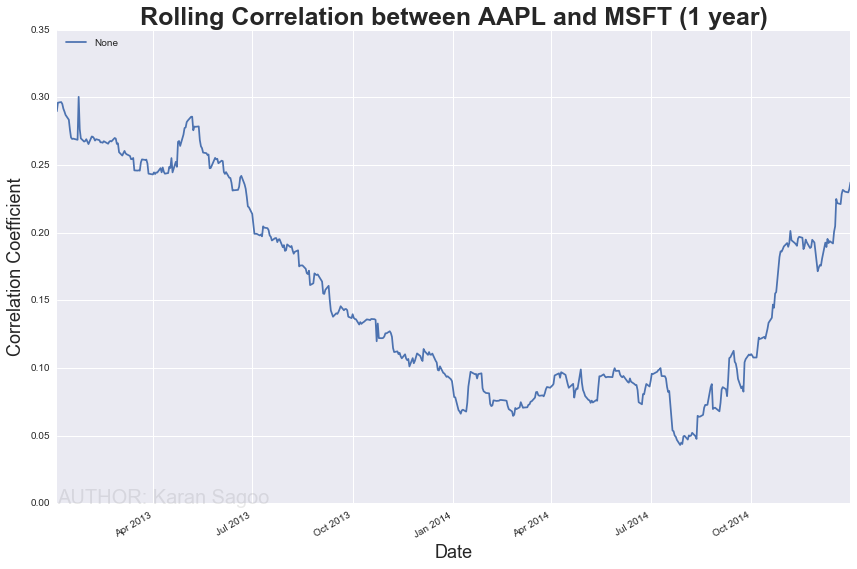

In [12]:
# plot the rolling correlation
%matplotlib inline
ax = rolling_corr.plot(figsize=(12,8));
fillAndSavePlot1(ax,"Rolling Correlation between AAPL and MSFT (1 year)", x= "Date", y ="Correlation Coefficient")

# Using Regression to capture change in volatilty between 2 stocks

In [13]:
# least squares on the returns of AAPL and MSFT
model = pd.ols(y=daily_pct_change['AAPL'], 
               x={'MSFT': daily_pct_change['MSFT']}, 
               window=250)
model

C:\Users\Rig\Anaconda2\lib\site-packages\ipykernel\__main__.py:4: FutureWarning: The pandas.stats.ols module is deprecated and will be removed in a future version. We refer to external packages like statsmodels, see some examples here: http://statsmodels.sourceforge.net/stable/regression.html



-------------------------Summary of Regression Analysis-------------------------

Formula: Y ~ <MSFT> + <intercept>

Number of Observations:         250
Number of Degrees of Freedom:   2

R-squared:         0.0539
Adj R-squared:     0.0501

Rmse:              0.0132

F-stat (1, 248):    14.1193, p-value:     0.0002

Degrees of Freedom: model 1, resid 248

-----------------------Summary of Estimated Coefficients------------------------
      Variable       Coef    Std Err     t-stat    p-value    CI 2.5%   CI 97.5%
--------------------------------------------------------------------------------
          MSFT     0.2625     0.0699       3.76     0.0002     0.1256     0.3994
     intercept     0.0013     0.0008       1.56     0.1195    -0.0003     0.0030
---------------------------------End of Summary---------------------------------

In [14]:
model.beta[0:5]

,MSFT,intercept
Date,,
2012-12-31,0.395,0.001
2013-01-02,0.408,0.001
2013-01-03,0.414,0.001
2013-01-04,0.422,0.001
2013-01-07,0.421,0.001


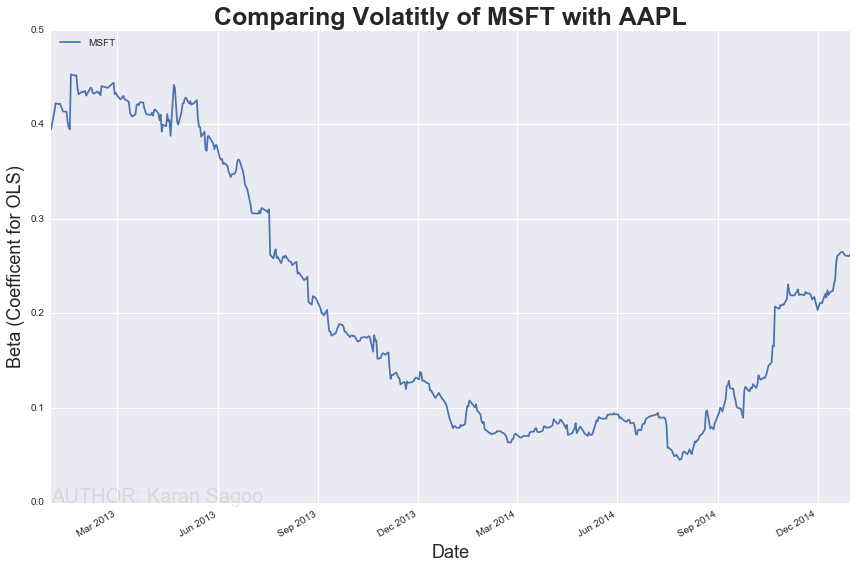

In [15]:
ax = model.beta['MSFT'].plot(figsize=(12, 8)); # plot the beta
fillAndSavePlot1(ax, title="Comparing Volatitly of MSFT with AAPL", y= "Beta (Coefficent for OLS)", x= "Date")

# Comparing stocks to the S&P 500
Comparing performance of stocks against the S&P 500 market Index

In [16]:
# we need to calculate the pct change on the close for S&P 500
sp_500_dpc = sp_500['Adj Close'].pct_change().fillna(0)
sp_500_dpc[:5]

Date
2012-01-03    0.000e+00
2012-01-04    1.879e-04
2012-01-05    2.944e-03
2012-01-06   -2.537e-03
2012-01-09    2.262e-03
Name: Adj Close, dtype: float64

In [17]:
# now concat the S&P data with the other daily pct values
dpc_all = pd.concat([sp_500_dpc, daily_pct_change], axis=1)
dpc_all.rename(columns={'Adj Close': 'SP500'}, inplace=True)
dpc_all[:5]

,SP500,AA,AAPL,DAL,GE,IBM,KO,MSFT,PEP,UAL
Date,,,,,,,,,,
2012-01-03,0.000e+00,0.000,0.000,0.000,0.000e+00,0.000,0.000,0.000,0.000,0.000
2012-01-04,1.879e-04,0.024,0.005,-0.004,1.089e-02,-0.004,-0.006,0.024,0.005,-0.020
2012-01-05,2.944e-03,-0.010,0.011,0.040,-5.388e-04,-0.005,-0.005,0.010,-0.008,-0.007
2012-01-06,-2.537e-03,-0.021,0.010,-0.001,5.391e-03,-0.011,-0.006,0.016,-0.013,-0.010
2012-01-09,2.262e-03,0.029,-0.002,-0.005,1.126e-02,-0.005,0.000,-0.013,0.005,-0.015


In [18]:
# from all the daily, calculate the cumulative
cdr_all = (1 + dpc_all).cumprod()
cdr_all[:5]

,SP500,AA,AAPL,DAL,GE,IBM,KO,MSFT,PEP,UAL
Date,,,,,,,,,,
2012-01-03,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000
2012-01-04,1.000,1.024,1.005,0.996,1.011,0.996,0.994,1.024,1.005,0.980
2012-01-05,1.003,1.014,1.017,1.036,1.010,0.991,0.989,1.034,0.997,0.973
2012-01-06,1.001,0.992,1.027,1.035,1.016,0.980,0.983,1.050,0.985,0.963
2012-01-09,1.003,1.022,1.026,1.030,1.027,0.975,0.983,1.036,0.990,0.949


In [19]:
# calculate the correlations
dpc_corrs = dpc_all.corr()
dpc_corrs

,SP500,AA,AAPL,DAL,GE,IBM,KO,MSFT,PEP,UAL
SP500,1.000,0.599,0.411,0.419,0.728,0.532,0.528,0.536,0.521,0.325
AA,0.599,1.000,0.237,0.251,0.458,0.311,0.228,0.310,0.226,0.221
AAPL,0.411,0.237,1.000,0.135,0.239,0.211,0.161,0.188,0.092,0.062
DAL,0.419,0.251,0.135,1.000,0.318,0.168,0.187,0.150,0.175,0.761
GE,0.728,0.458,0.239,0.318,1.000,0.437,0.390,0.342,0.382,0.238
IBM,0.532,0.311,0.211,0.168,0.437,1.000,0.305,0.357,0.258,0.124
KO,0.528,0.228,0.161,0.187,0.390,0.305,1.000,0.271,0.557,0.139
MSFT,0.536,0.310,0.188,0.150,0.342,0.357,0.271,1.000,0.284,0.127
PEP,0.521,0.226,0.092,0.175,0.382,0.258,0.557,0.284,1.000,0.130
UAL,0.325,0.221,0.062,0.761,0.238,0.124,0.139,0.127,0.130,1.000


In [20]:
# how well did each stock relate to the S&P 500?
dpc_corrs.ix['SP500']

SP500    1.000
AA       0.599
AAPL     0.411
DAL      0.419
GE       0.728
IBM      0.532
KO       0.528
MSFT     0.536
PEP      0.521
UAL      0.325
Name: SP500, dtype: float64

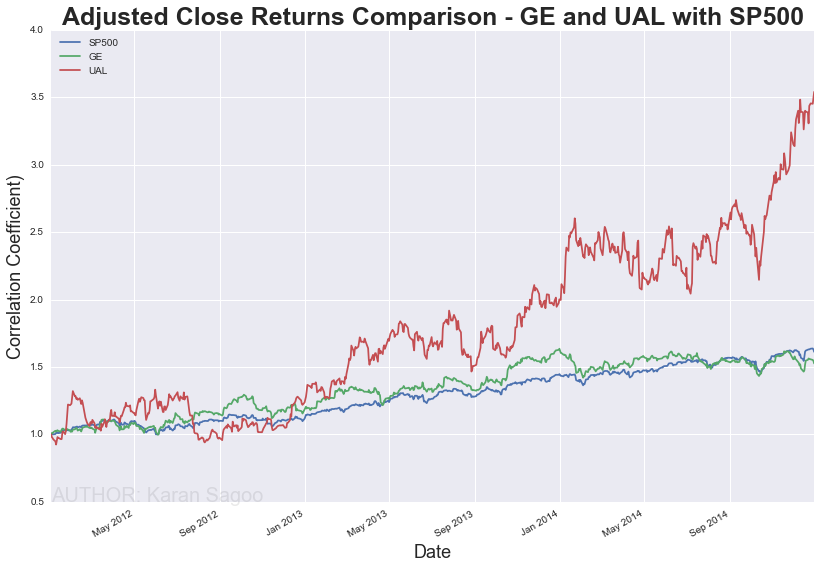

In [21]:
# plot GE/UAL against S&P500
ax = cdr_all[['SP500', 'GE', 'UAL']].plot(figsize=(12,8));
fillAndSavePlot1(ax,title = "Adjusted Close Returns Comparison - GE and UAL with SP500", x = "Date", y = "Correlation Coefficient)" )

GE was a good investmnet as it remains closest to the SP500 curve
UAL seems a bad investment relative to GE because it strays away from the SP 500 cuve

In [24]:
def render_scatter_plot(data, x_stock_name, 
                        y_stock_name, xlim=None, ylim=None):
    fig = plt.figure(figsize=(12,8))
    ax = fig.add_subplot(111)
    ax.scatter(data[x_stock_name], data[y_stock_name])
    if xlim is not None: ax.set_xlim(xlim)
    ax.autoscale(False)
    # horiz and v lines at 0
    ax.vlines(0, -10, 10)
    ax.hlines(0, -10, 10)
    # this line would be perfect correlation
    ax.plot((-10, 10), (-10, 10))
    # label axes
    ax.set_xlabel(x_stock_name)
    ax.set_ylabel(y_stock_name)

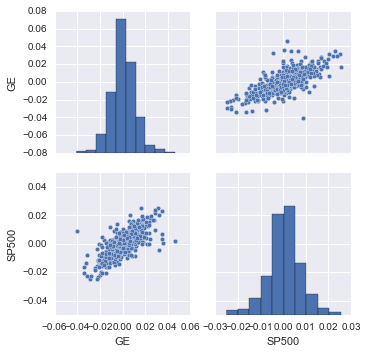

In [32]:
sns.pairplot(data = dpc_all[["GE","SP500"]])

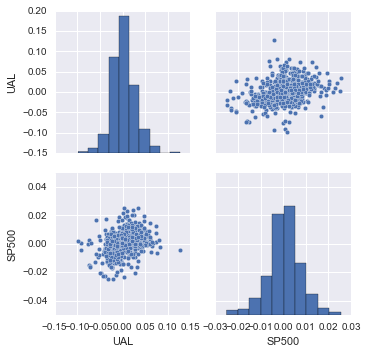

In [35]:
sns.pairplot(data = dpc_all[["UAL","SP500"]])

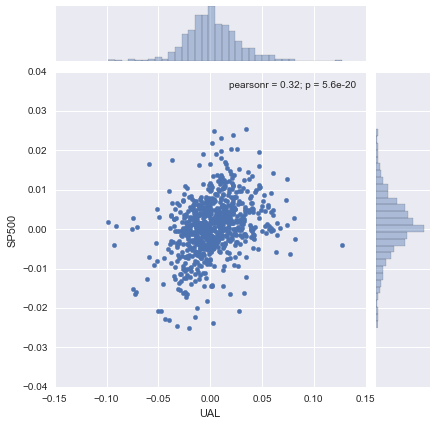

In [37]:
sns.jointplot(x="UAL", y="SP500", data=dpc_all)

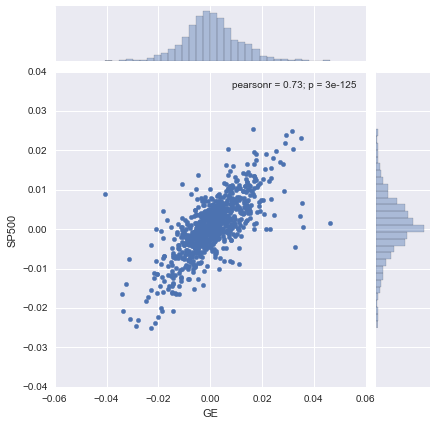

In [39]:
sns.jointplot(x="GE", y="SP500", data=dpc_all)

In [ ]:
sns.pairplot(dpc_all)